In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
cars_data=pd.read_excel('ToyotaCorolla1.xlsx')
cars_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
cars_df=cars_data.loc[:, ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars_df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
final_df=cars_df.rename({"Age_08_04":"Age"},axis=1)
final_df

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### <font color=BROWN>EDA</font>

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
final_df[final_df.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
final_df.drop(final_df.index[[113]],inplace=True)

In [8]:
final_df.shape

(1435, 9)

In [9]:
final_df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [10]:
final_df.Doors.value_counts()

5    673
3    622
4    138
2      2
Name: Doors, dtype: int64

In [11]:
final_df.Gears.value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

Text(0.5, 1.0, 'Correlation between variables')

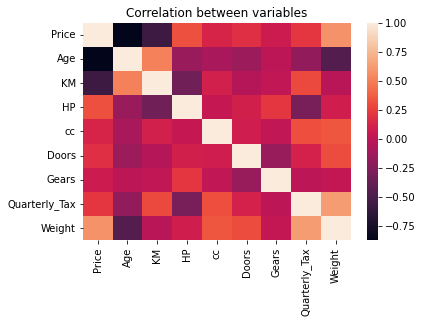

In [12]:
corr=final_df.corr()
sns.heatmap(corr)
plt.title("Correlation between variables")

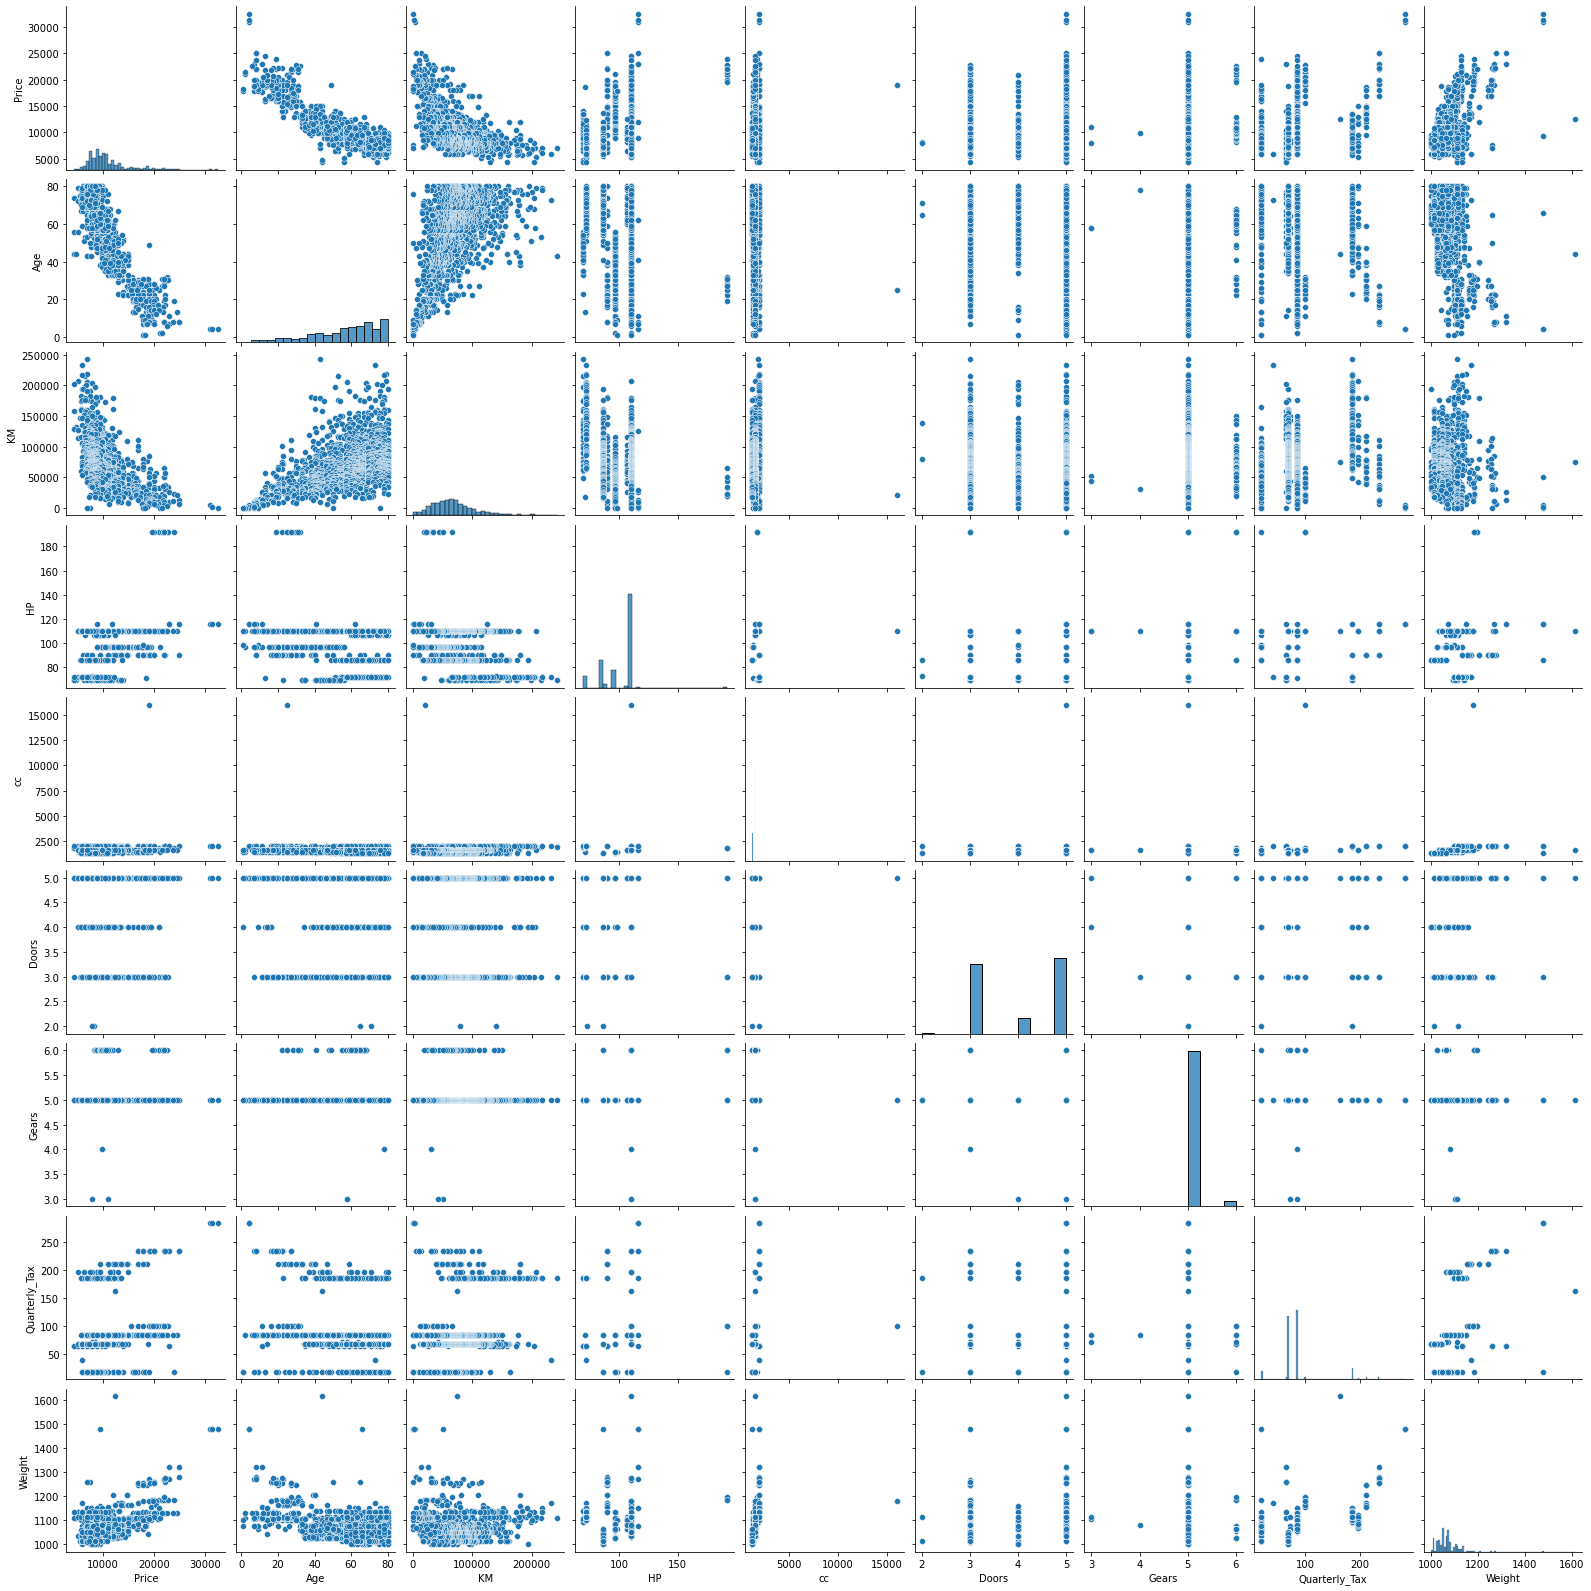

In [13]:
sns.pairplot(data=final_df)

C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


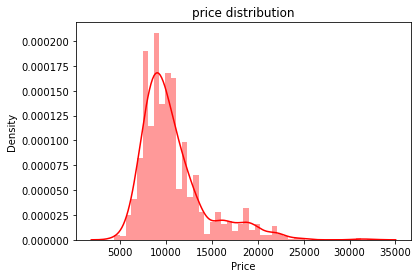

In [14]:
plt.title("price distribution")
sns.distplot(final_df['Price'],color='red');



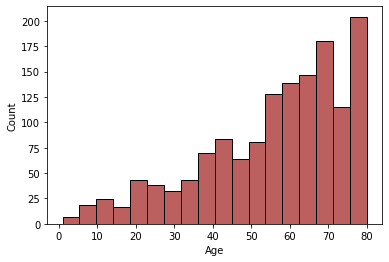

In [15]:
sns.histplot(final_df['Age'],color='brown');

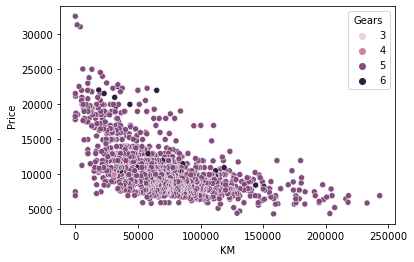

In [16]:
sns.scatterplot(x='KM',y='Price',data=final_df,hue='Gears');

### Model building

In [78]:
final_df.shape

(1435, 9)

In [79]:
model = smf.ols('Price~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=final_df).fit()

In [80]:
model.params

Intercept       -8003.469231
Age              -120.562600
KM                 -0.023528
cc                 -0.024838
Doors              30.922111
Gears            1130.524728
Quarterly_Tax      -1.682462
Weight             20.018116
dtype: float64

In [81]:
#rsquares
model.rsquared,model.rsquared_adj

(0.8504054185322638, 0.8496715978803548)

In [82]:
np.round(model.pvalues,5) , model.tvalues

(Intercept        0.00000
 Age              0.00000
 KM               0.00000
 cc               0.79056
 Doors            0.45733
 Gears            0.00000
 Quarterly_Tax    0.18399
 Weight           0.00000
 dtype: float64,
 Intercept        -5.505904
 Age             -44.254657
 KM              -18.375543
 cc               -0.265630
 Doors             0.743446
 Gears             5.671830
 Quarterly_Tax    -1.329209
 Weight           18.609507
 dtype: float64)

**Building model for cc and Doors variables**

In [83]:
mcc=smf.ols('Price~cc',data=final_df).fit()

In [84]:
mcc.pvalues,mcc.tvalues

(Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64,
 Intercept    24.879592
 cc            4.745039
 dtype: float64)

In [85]:
mD=smf.ols('Price~Doors',data=final_df).fit()
mD.pvalues,mD.tvalues

(Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64,
 Intercept    19.421546
 Doors         7.070520
 dtype: float64)

In [86]:
#Both cc and Doors have significant p values
Dcc=smf.ols('Price~cc+Doors',data=final_df).fit()
Dcc.tvalues , Dcc.pvalues 

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

### Model validataion techniques

In [87]:
#1) Collenarity check
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=final_df).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=final_df).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=final_df).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

In [88]:
vif_Gears

1.0988429081631148

In [89]:
vif_values=pd.DataFrame({'Variables':['Age','KM','HP','cc','Doors','Gears','Quaterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]})
vif_values

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quaterly_Tax,2.295375
7,Weight,2.487180


The Variance inflation value is less than 20 for all variables so there is no collinearity problem,

C:\Users\91775\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


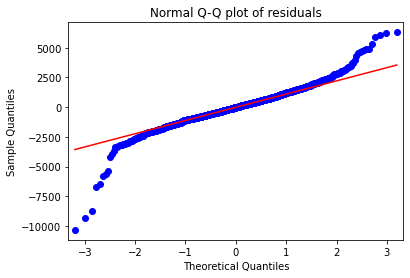

In [90]:
#2) Residual analysis using qq plot
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [91]:
#finding outliers
list[np.where(model.resid>6000)]

list[array([109, 146, 522], dtype=int64)]

In [92]:
list[np.where(model.resid<-6000)]

list[array([190, 191, 220, 600, 959], dtype=int64)]

In [93]:
def st_values(v):
    return (v-v.mean())/v.std()

for calculating z vaues using the formula:z = (x - mu)/sigma

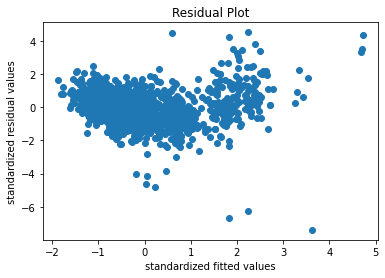

In [94]:
plt.scatter(st_values(model.fittedvalues),st_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

There is no pattern so no problem.

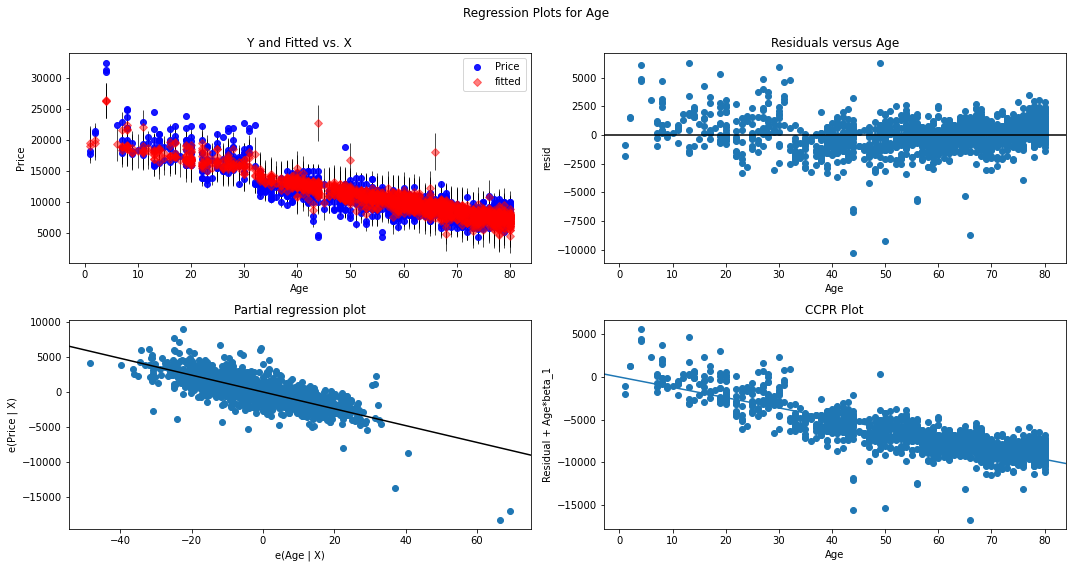

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

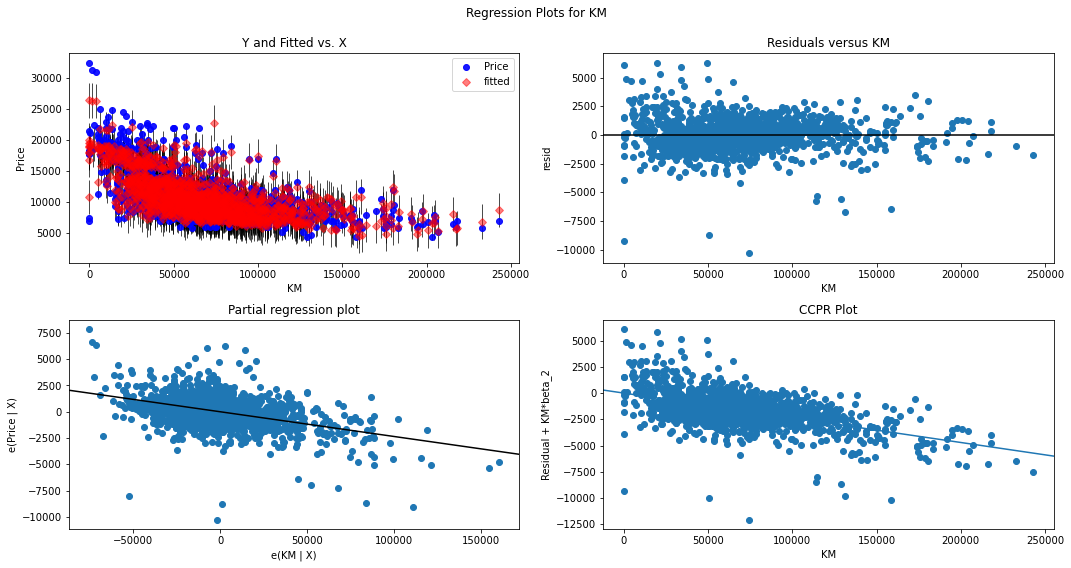

In [96]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

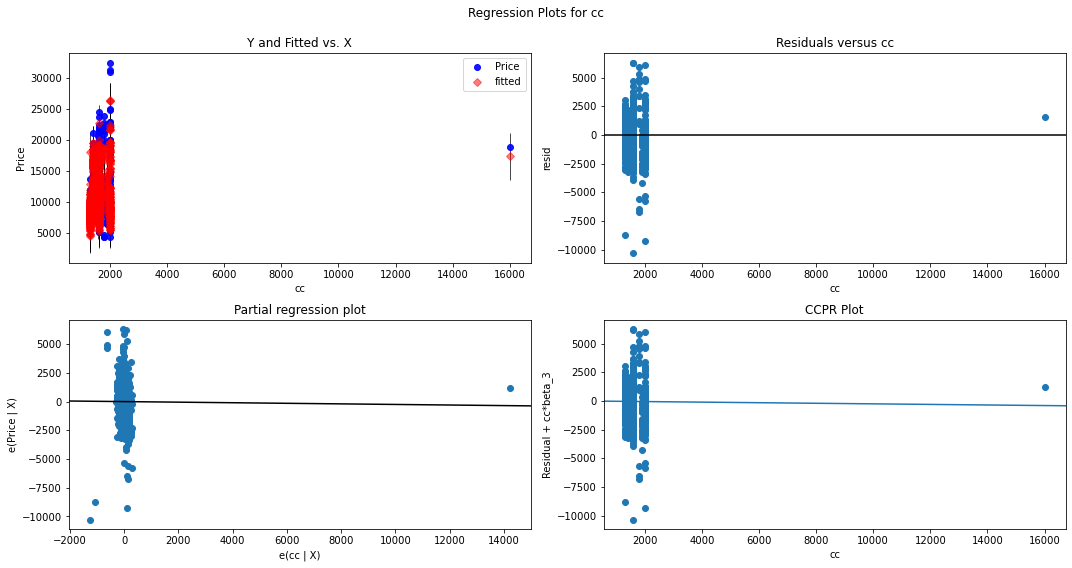

In [97]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

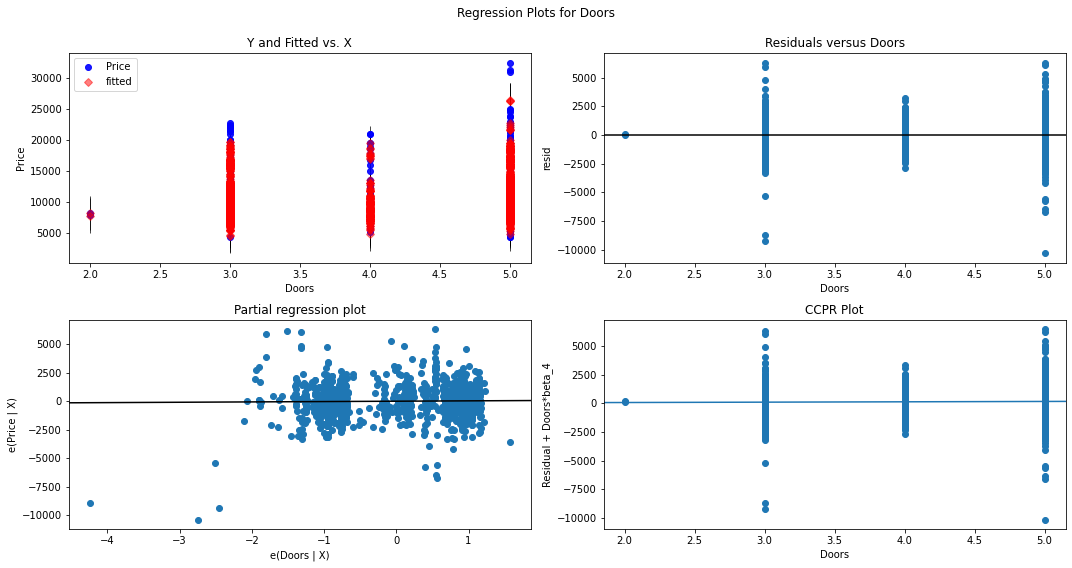

In [98]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


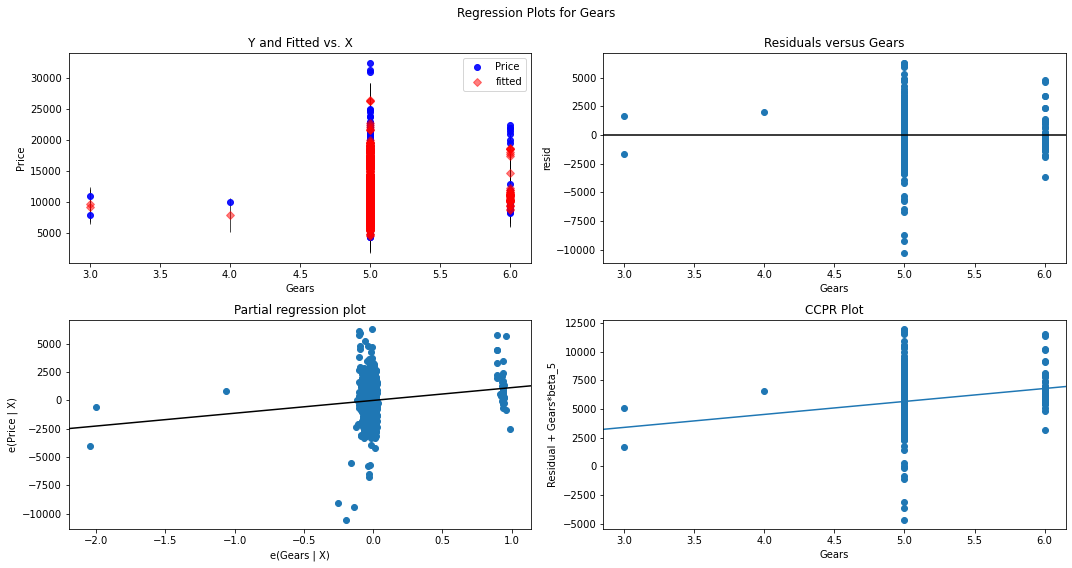

In [99]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

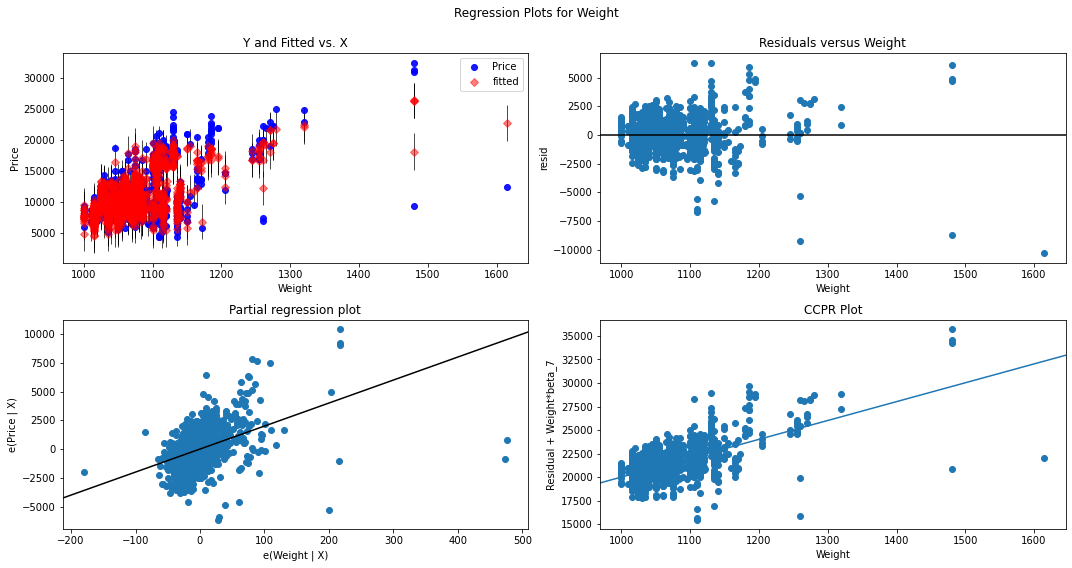

In [100]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics

In [101]:
#1) cooks distance
(c,_)=model.get_influence().cooks_distance
c

array([7.42507700e-03, 3.80496670e-03, 5.65263777e-03, ...,
       7.09289965e-05, 1.12836270e-03, 1.34819765e-02])

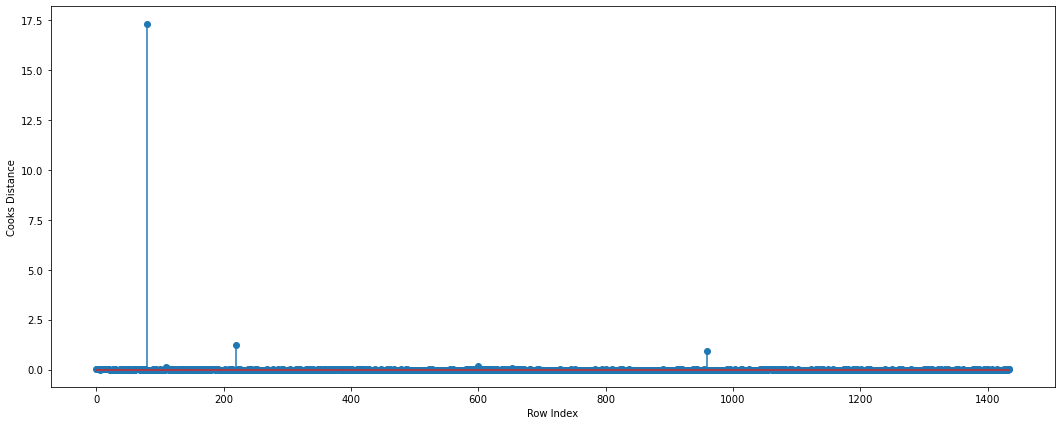

In [102]:
plt.figure(figsize=(18,7))
plt.stem(np.arange(len(final_df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [103]:
np.argmax(c) , np.max(c)

(80, 17.320698439398157)

If Cook's distance > 1, then it's an outlier.

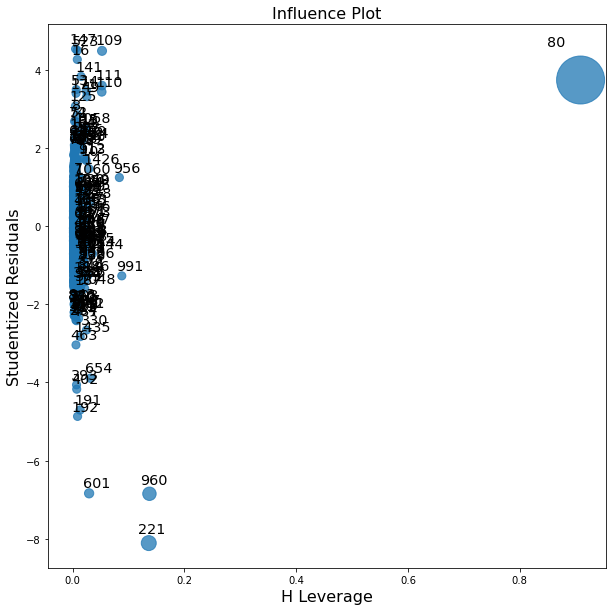

In [104]:
#2) Leverage value
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

<font color = maroon>Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints.</font>

In [105]:
k=final_df.shape[1]
n=final_df.shape[0]
leverage_cutoff= (3*(k+1)/n)
leverage_cutoff

0.020905923344947737

In [106]:
final_df[final_df.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Creating a new model without outlers

In [107]:
new_data= final_df.copy()
new_data.drop(new_data.index[80],axis=0).reset_index(drop=True)
new_data.shape

(1435, 9)

In [108]:
new_data.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [109]:
new_model= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()

In [110]:
new_model.rsquared,new_model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

#### predictive system

In [111]:
pdata=pd.DataFrame({'Age':30,"KM":50000,"HP":70,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":79,"Weight":1100},index=[0])
pdata

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,30,50000,70,1300,4,5,79,1100


In [112]:
new_model.predict(pdata)

0    13726.727741
dtype: float64

## <font color=Skyblue>Rsquares</font>

In [114]:
pd.DataFrame({"models":["model","new_model"],"rsquares":[model.rsquared,new_model.rsquared]})

,models,rsquares
0,model,0.850405
1,new_model,0.862520


The model has been improved by 1%